# Concurrency

La concurrence et l'une de ses manifestations, le traitement parallèle, sont parmi les sujets les plus larges dans le domaine du génie logiciel. La concurrence est un sujet tellement vaste que des dizaines de livres pourraient être écrits et nous ne serions toujours pas en mesure de discuter de tous ses aspects et modèles importants. 

Le but de ce guide est de vous montrer pourquoi la concurrence peut être requise dans votre application, quand l'utiliser et quels sont les modèles de concurrence les plus importants de Python. Nous discuterons de certaines des fonctionnalités du langage, des modules intégrés et des packages tiers qui vous permettent d'implémenter ces modèles dans votre code. 

Mais nous ne les couvrirons pas en détail. Considérez le contenu de ce guide comme un point d'entrée pour vos propres recherches et lectures. Nous essaierons de vous guider à travers les idées de base et de vous aider à décider si vous avez vraiment besoin de la simultanéité. Nous espérons qu'après avoir lu ce guide, vous serez en mesure de déterminer quelle approche convient le mieux à vos besoins. Dans ce guide, nous aborderons les sujets suivants :

*  Qu'est-ce que la concurrence ?
* Multithreading
* Multiprocessing
* Programmation asynchroneAvant 

d'aborder les concepts de base de la concurrence , commençons par examiner les exigences techniques.

## Qu'est-ce que la concurrence ? 

La concurrence est souvent confondue avec les méthodes réelles de mise en œuvre. Certains programmeurs pensent également qu'il s'agit d'un synonyme de traitement parallèle. C'est la raison pour laquelle nous devons commencer par bien dénir la concomitance. 

Ce n'est qu'alors que nous pourrons bien comprendre les différents modèles de concurrence et leurs principales différences. 

Tout d'abord, la concurrence n'est pas la même chose que le parallélisme. La concurrence n'est pas non plus une question de mise en œuvre de l'application. La simultanéité est une propriété d'un programme, d'un algorithme ou d'un problème, alors que le parallélisme n'est qu'une des approches possibles des problèmes simultanés. 

Dans l'article de 1976 de Leslie Lamport, Time, Clocks, and the Ordering of Events in Distributed Systems, il définit le concept de simultanéité comme suit: 

« Deux événements sont concurrents si aucun ne peut affecter l'autre de manière causale. » 

En extrapolant les événements aux programmes, les algorithmes , ou des problèmes, nous pouvons dire que quelque chose est concurrent s'il peut être entièrement ou partiellement décomposé en composants (unités) qui sont indépendants de l'ordre. Ces unités peuvent être traitées indépendamment les unes des autres et l'ordre de traitement n'affecte pas le résultat final. Cela signifie qu'ils peuvent également être traités simultanément ou en parallèle. Si nous traitons l'information de cette manière (c'est-à-dire en parallèle), alors nous avons bien affaire à un traitement parallèle. Mais ce n'est toujours pas obligatoire.



Travailler de manière distribuée, en utilisant de préférence les capacités des processeurs multicœurs ou des clusters de calcul, est une conséquence naturelle des problèmes simultanés. 

Quoi qu'il en soit, cela ne signifie pas que c'est la seule façon de traiter efficacement la concurrence. Il existe de nombreux cas d'utilisation où les problèmes concurrents peuvent être abordés autrement que de manière synchrone, mais sans avoir besoin d'une exécution parallèle. 

En d'autres termes, lorsqu'un problème est concurrent, cela vous donne la possibilité de le traiter d'une manière spéciale, de préférence plus efcace. 

On s'habitue souvent à résoudre les problèmes de manière classique : en effectuant une séquence d'étapes. C'est ainsi que la plupart d'entre nous pensons et traitons l'information, à l'aide d'algorithmes synchrones qui font une chose à la fois, étape par étape. Mais ce mode de traitement de l'information n'est pas bien adapté à la résolution de problèmes à grande échelle ou lorsque vous devez satisfaire les demandes de plusieurs utilisateurs ou agents logiciels simultanément : 

* Lorsque le temps de traitement du travail est limité par les performances de l'unité de traitement unique (une seule machine, un cœur de processeur, etc.)

* Lorsque vous n'êtes pas en mesure d'accepter et de traiter de nouvelles entrées tant que votre programme n'a pas fini de traiter la précédente

Ces problèmes créent trois scénarios d'application courants où le traitement simultané est une approche viable pour satisfaire l'utilisateur besoins :

* Distribution du traitement : l'ampleur du problème est si importante que la seule façon de le traiter dans un délai acceptable (avec des ressources limitées) est de répartir l'exécution sur plusieurs unités de traitement pouvant gérer le travail en parallèle.

* Réactivité de l'application : votre application doit conserver sa réactivité (accepter les nouvelles entrées), même si elle n'a pas terminé le traitement des entrées précédentes.

*  Traitement en arrière-plan : toutes les tâches ne sont pas doit être exécuté de manière synchrone. S'il n'est pas nécessaire d'accéder immédiatement aux résultats d'une action spécifique, il peut être raisonnable de différer l'exécution dans le temps. 


Le scénario de répartition du traitement correspond directement au traitement parallèle. C'est pourquoi il est généralement résolu avec des modèles de multithreading et de multiprocessing. Le scénario de réactivité des applications ne nécessite souvent pas de traitement parallèle, de sorte que la solution réelle dépend vraiment des détails du problème. Le problème de la réactivité de l'application couvre également le cas où l'application doit servir plusieurs clients (utilisateurs ou agents logiciels) de manière indépendante, sans avoir besoin d'attendre que les autres soient servis avec succès.


C'est une observation intéressante que ces groupes de problèmes ne sont pas exclusifs. Souvent, vous devrez maintenir la réactivité de l'application et en même temps, vous ne pourrez pas gérer toutes les entrées sur une seule unité de traitement. C'est la raison pour laquelle des approches différentes et apparemment alternatives ou contradictoires de la concurrence peuvent souvent être utilisées en même temps. Ceci est particulièrement courant dans le développement de serveurs Web, où il peut être nécessaire d'utiliser des boucles d'événements asynchrones, ou des threads en conjonction avec plusieurs processus, afin d'utiliser toutes les ressources disponibles tout en maintenant de faibles latences sous la charge élevée. 

Python fournit plusieurs façons de gérer la simultanéité. Il s'agit principalement de :

* **Multithreading** : il se caractérise par l'exécution de plusieurs threads d'exécution qui partagent le contexte mémoire du processus parent. C'est l'un des modèles de concurrence les plus populaires (et les plus anciens) et il fonctionne mieux dans les applications qui effectuent de nombreuses opérations d'E/S (entrée/sortie) ou qui doivent maintenir la réactivité de l'interface utilisateur. Il est assez léger mais comporte de nombreuses mises en garde et risques pour la sécurité de la mémoire. 

* **Multitraitement** : il se caractérise par l'exécution de plusieurs processus indépendants pour effectuer un travail de manière distribuée. Il est similaire aux threads en fonctionnement, bien qu'il ne repose pas sur un contexte de mémoire partagée. En raison de la nature de Python, il est mieux adapté aux applications gourmandes en CPU. Il est plus lourd que le multithreading et nécessite la mise en œuvre de modèles de communication interprocessus pour orchestrer le travail entre les processus.

* **Programmation asynchrone** : elle se caractérise par l'exécution de plusieurs tâches coopératives au sein d'un seul processus d'application. Les tâches coopératives fonctionnent comme des threads, bien que le basculement entre eux soit facilité par l'application elle-même au lieu du noyau du système d'exploitation. Il est bien adapté aux applications liées aux E/S, en particulier pour les programmes qui doivent gérer plusieurs connexions réseau simultanées. L'inconvénient de la programmation asynchrone est la nécessité d'utiliser des bibliothèques asynchrones dédiées. Le premier modèle dont nous parlerons en détail est le multithreading.



## Multithreading 

Les développeurs considèrent souvent le multithreading comme un sujet très complexe. Bien que cette déclaration soit totalement vraie, Python fournit des classes et des fonctions de haut niveau qui aident grandement à utiliser les threads. CPython a des détails d'implémentation peu pratiques qui rendent les threads moins efficaces que dans d'autres langages de programmation comme C ou Java. Mais cela ne signifie pas qu'ils sont complètement inutiles en Python.

Il existe encore un large éventail de problèmes qui peuvent être résolus efficacement et facilement avec les threads Python.

 Dans cette section, nous discuterons des limitations du multithreading dans CPython, ainsi que des problèmes concurrents courants pour lesquels les threads Python sont toujours une solution viable. .

## Qu'est-ce que le multithreading ?

Thread est l'abréviation d'un thread d'exécution. Un programmeur peut diviser son travail en threads qui s'exécutent simultanément. Les threads sont toujours liés au processus parent et peuvent facilement communiquer car ils partagent le même contexte de mémoire. L'exécution des threads est coordonnée par le noyau du système d'exploitation. Le multithreading bénéficiera d'une machine multiprocesseur ou multicœur, où chaque thread peut être exécuté sur un cœur de processeur distinct, ce qui accélère l'exécution du programme. C'est une règle générale qui devrait s'appliquer à la plupart des langages de programmation. En Python, les avantages en termes de performances du multithreading sur les processeurs multicœurs ont certaines limites, dont nous parlerons plus tard. Par souci de simplicité, supposons pour l'instant que cette déclaration est également vraie pour Python. La façon la plus simple de démarrer un nouveau thread d'exécution à l'aide de Python est d'utiliser la classe threading.Thread() comme dans l'exemple suivant :

In [ ]:
from threading import Thread

def my_function():    
  print("printing from thread")

if __name__ == "__main__":    
  thread = Thread(target=my_function)    
  thread.start()    
  thread.join()

printing from thread


La fonction my_function() est la fonction que nous voulons exécuter dans le nouveau thread. Nous le transmettons au constructeur de la classe Thread en tant qu'argument de mot-clé cible. 

Les instances de cette classe sont utilisées pour encapsuler et contrôler les threads d'application. La création d'une nouvelle instance de classe Thread n'est pas suffisante pour démarrer un nouveau thread. Pour ce faire, vous devez appeler la méthode start(). Une fois le nouveau thread démarré, il s'exécutera à côté du thread principal jusqu'à ce que la fonction cible se termine. Dans l'exemple ci-dessus, nous attendons explicitement que le thread supplémentaire se termine en utilisant la méthode join()

    On dit que la méthode join() est une opération bloquante. 
    Cela signifie que le thread ne fait rien de particulier (il ne consomme pas de temps CPU)
    et attend simplement qu'un événement spécifique se produise

Les méthodes start() et join() vous permettent de créer et de démarrer plusieurs threads à la fois. Ce qui suit est une simple modification de l'exemple précédent qui démarre et joint plusieurs threads en bloc :

In [ ]:
from threading import Thread

def my_function():    
  print("printing from thread")
  
if __name__ == "__main__":    
  
  threads = [Thread(target=my_function) for _ in range(10)]    
  
  for thread in threads:        
    thread.start()

  for thread in threads:        
    thread.join()

printing from thread
printing from thread
printing from thread
printing from thread
printing from thread
printing from thread
printing from thread
printing from thread
printing from thread
printing from thread


Tous les threads partagent le même contexte mémoire. Cela signifie que vous devez être extrêmement prudent quant à la façon dont vos threads accèdent aux mêmes structures de données. Si deux threads parallèles mettent à jour la même variable sans aucune protection, il peut arriver qu'une subtile variation temporelle dans l'exécution du thread puisse altérer le résultat final de manière inattendue. Pour mieux comprendre ce problème, considérons un petit programme qui exécute plusieurs threads en lisant et en mettant à jour la même valeur :

In [ ]:
from threading import Thread

thread_visits = 0

def visit_counter():    
  global thread_visits    
  for i in range(100_000):        
    value = thread_visits        
    thread_visits = value + 1

if __name__ == "__main__":    
  thread_count = 100    
  threads = [        
             Thread(target=visit_counter)        
             for _ in range(thread_count)    
             ]    
  for thread in threads:        
    thread.start()    
  
  for thread in threads:        
    thread.join()    
  
  print("thread_count={}, thread_visits{}".format(thread_count,thread_visits))

thread_count=100, thread_visits7299544


Le programme ci-dessus démarre 100 threads et chacun essaie de lire et d'incrémenter la variable thread_visits 100 000 fois. Si nous devions exécuter les tâches de manière séquentielle, la valeur finale de la variable thread_visits devrait être de 10 000 000. Mais les fils peuvent s'entremêler et conduire à des résultats inattendus. Enregistrons l'exemple de code ci-dessus dans le fichier threaded_visits.py et exécutons-le plusieurs fois pour voir les résultats réels


À chaque exécution, nous avons obtenu un nombre complètement différent, et c'était toujours très loin des 10 000 000 de visites de threads attendues. Mais cela ne signifie pas que le nombre réel de visites de threads était si petit. Avec un si grand nombre de fils de discussion, ils ont commencé à s'entremêler et à affecter nos résultats. Une telle situation s'appelle un risque de course ou une condition de course. 

C'est l'un des coupables les plus détestés des bogues logiciels pour les applications multithread. De toute évidence, il y a une tranche de temps entre les opérations de lecture et d'écriture sur la variable thread_visits où un autre thread peut intervenir et manipuler le résultat.

On pourrait penser que le problème pourrait être résolu en utilisant l'opérateur +=, qui ressemble à une seule opération atomique :

In [ ]:
def visit_counter():    
  global thread_visits    
  for i in range(100_000):        
    thread_visits += 1

Mais cela ne nous aidera pas non plus ! L'opérateur += n'est qu'un raccourci pour incrémenter une variable, mais il faudra en fait quelques opérations dans l'interpréteur Python. Entre ces opérations, les threads ont encore le temps de s'entremêler. La bonne façon de contourner les conditions de concurrence est d'utiliser des primitives de verrouillage de thread. Python a quelques classes de verrouillage dans le module de threading. Ici, nous pouvons utiliser le plus simple : threading.Lock. Voici un exemple de fonction visit_counter() thread-safe :

In [ ]:
from threading import Lock

thread_visits = 0
thread_visits_lock = Lock()

def visit_counter():    
  global thread_visits    
  for i in range(100_000):        
    with thread_visits_lock:            
      thread_visits += 1

if __name__ == "__main__":    
  thread_count = 100    
  threads = [        
             Thread(target=visit_counter)        
             for _ in range(thread_count)    
             ]    
  for thread in threads:        
    thread.start()    
  
  for thread in threads:        
    thread.join()    
  
  print("thread_count={}, thread_visits{}".format(thread_count,thread_visits))

thread_count=100, thread_visits10000000


Si vous exécutez la version modifiée du code, vous remarquerez que les visites de threads avec des verrous sont comptées correctement. Mais cela se fera au détriment des performances. Le threading Lock() s'assurera qu'un seul thread à la fois peut traiter un seul bloc de code. Cela signifie que le bloc protégé ne peut pas fonctionner en parallèle. De plus, l'acquisition et la libération du verrou sont des opérations qui nécessitent un effort supplémentaire. Avec de nombreux threads essayant d'accéder au verrou, une baisse des performances sera perceptible. Nous verrons d'autres exemples d'utilisation de verrous pour sécuriser l'accès parallèle aux données plus loin dans le guide. Le multithreading est généralement pris en charge au niveau du noyau du système d'exploitation. Lorsqu'une machine a un seul processeur avec un seul cœur, le système utilise un mécanisme de découpage temporel pour permettre aux threads de s'exécuter apparemment en parallèle. Avec le découpage temporel, le processeur passe d'un thread à un autre si rapidement qu'il y a l'illusion de threads s'exécutant simultanément.


    Les processeurs monocœur sont assez rares de nos jours sur les ordinateurs
    de bureau, mais peuvent toujours être une préoccupation dans d'autres domaines.
    Les petites instances bon marché dans de nombreuses plates-formes de calcul cloud, 
    ainsi que les systèmes embarqués à faible coût, n'ont souvent que des
    processeurs monocœur ou des processeurs virtuels.

Le parallélisme sans plusieurs unités de traitement est évidemment virtuel, et le gain de performances applicatives sur un tel matériel est plus difficile à évaluer. 

Quoi qu'il en soit, parfois, il est toujours utile d'implémenter du code avec des threads, quitte à devoir s'exécuter sur un seul cœur. Nous passerons en revue ces cas d'utilisation plus tard. 

Tout change lorsque votre environnement d'exécution comporte plusieurs processeurs ou plusieurs cœurs de processeur. 

Dans de tels cas, les threads peuvent être répartis entre les processeurs ou leurs cœurs par le noyau du système d'exploitation. Cela offre donc la possibilité d'exécuter votre programme beaucoup plus rapidement. Cela est vrai pour de nombreux langages de programmation mais pas nécessairement pour Python. Pour comprendre pourquoi il en est ainsi, examinons de plus près comment Python traite les threads.

## Quand devons-nous utiliser le multithreading ?

Malgré la limitation GIL, les threads peuvent être vraiment utiles dans certains des cas suivants :

* Réactivité des applications : les applications peuvent accepter de nouvelles entrées et répondre dans un délai donné (être réactives) même si elles ne l'ont pas fait de traitement des entrées précédentes.

* Applications multi-utilisateurs et communication réseau : les applications censées accepter les entrées de plusieurs utilisateurs simultanément communiquent souvent avec les utilisateurs sur le réseau. Cela signifie qu'ils peuvent réduire considérablement l'impact du verrouillage en tirant parti des parties de CPython où le GIL est publié.

* Délégation du travail et traitement en arrière-plan : applications où une grande partie du travail est effectuée par des applications ou des services externes et votre code agit comme un passerelle vers ces ressources.Commençons par les applications réactives, car ce sont celles qui ont tendance à préférer le multithreading aux autres modèles de concurrence.

## Un exemple d'application multithread

Pour voir comment fonctionne le threading Python en pratique, construisons un exemple d'application qui pourrait bénéficier de l'utilisation de threads. Nous allons considérer un problème simple qui a déjà été souligné dans la section précédente comme un cas d'utilisation courant pour le multithreading : faire des requêtes HTTP parallèles à un service distant. 

Disons que nous devons récupérer des informations à partir d'un service Web en utilisant plusieurs requêtes qui ne peuvent pas être regroupées une seule requête HTTP en masse. À titre d'exemple réaliste, nous utiliserons le point de terminaison des taux de change de référence d'une API gratuite, disponible sur https://www.vatcomply.com. Les raisons de ce choix sont les suivantes :

* Ce service est ouvert et ne nécessite aucune clé d'authentification.
* L'interface du service est très simple et peut être facilement interrogée à l'aide de la bibliothèque de requêtes populaire.
*  Cette API utilise un format de données monétaires commun à de nombreuses API similaires. Si ce service tombe en panne (ou cesse d'être gratuit), vous pourrez facilement basculer l'URL de base de l'API vers l'URL d'un autre service

    
    Les services API gratuits vont et viennent. Il est possible qu'après un
    certain temps, les URL de ce guide ne fonctionnent plus ou que l'API
    nécessite un abonnement payant. Dans de tels cas, exécuter votre propre
    service peut être une bonne option. Sur https://github.com/exchangeratesapi/exchangeratesapi, 
    vous pouvez trouver le code d'un service d'API de change qui utilise le
    même format de données que l'API utilisée dans ce guide

Dans nos exemples, nous essaierons d'obtenir des taux de change pour des devises sélectionnées en utilisant plusieurs devises comme points de référence. Nous présenterons ensuite les résultats sous la forme d'une matrice de taux de change, similaire à la suivante

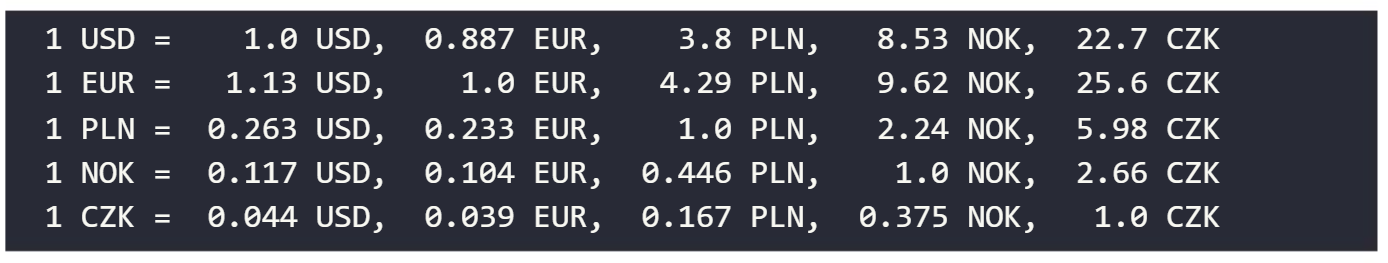

L'API que nous avons choisie offre plusieurs façons d'interroger plusieurs points de données dans des requêtes uniques, mais malheureusement, elle ne vous permet pas d'interroger des données en utilisant plusieurs devises de base à la fois. Obtenir le taux pour une seule base est aussi simple que de faire ce qui suit

In [ ]:
import requests
response = requests.get("https://api.vatcomply.com/rates?base=USD")
response.json()

{'base': 'USD',
 'date': '2021-10-22',
 'rates': {'AUD': 1.3336199484092863,
  'BGN': 1.6816852966466036,
  'BRL': 5.701117798796217,
  'CAD': 1.233104041272571,
  'CHF': 0.9172828890799656,
  'CNY': 6.391831470335339,
  'CZK': 22.05932932072227,
  'DKK': 6.397678417884781,
  'EUR': 0.8598452278589853,
  'GBP': 0.7254514187446259,
  'HKD': 7.774032674118659,
  'HRK': 6.471625107480653,
  'HUF': 312.57093723129833,
  'IDR': 14187.815993121238,
  'ILS': 3.207566638005159,
  'INR': 74.87016337059329,
  'ISK': 129.14875322441958,
  'JPY': 113.86930352536544,
  'KRW': 1176.603611349957,
  'MXN': 20.240928632846085,
  'MYR': 4.150042992261393,
  'NOK': 8.3469475494411,
  'NZD': 1.3978503869303525,
  'PHP': 50.80309544282029,
  'PLN': 3.9531384350816854,
  'RON': 4.252278589853827,
  'RUB': 70.38572656921754,
  'SEK': 8.576784178847808,
  'SGD': 1.3472914875322441,
  'THB': 33.33018056749785,
  'TRY': 9.615649183147033,
  'USD': 1.0,
  'ZAR': 14.671195184866724}}


Puisque notre objectif est de montrer comment une solution multithread de problèmes concurrents se compare à une solution synchrone classique, nous allons commencer par une implémentation qui n'utilise pas du tout de threads. Voici le code d'un programme qui parcourt la liste des devises de base, interroge l'API des taux de change et affiche les résultats sur la sortie standard sous forme de tableau au format texte.

In [ ]:
import time

import requests

SYMBOLS = ("USD", "EUR", "PLN", "NOK", "CZK")
BASES = ("USD", "EUR", "PLN", "NOK", "CZK")


def fetch_rates(base):
    response = requests.get(f"https://api.vatcomply.com/rates?base={base}")
    response.raise_for_status()
    rates = response.json()["rates"]

    # note: same currency exchanges to itself 1:1
    rates[base] = 1.0

    rates_line = ", ".join([f"{rates[symbol]:7.03} {symbol}" for symbol in SYMBOLS])
    print(f"1 {base} = {rates_line}")


def main():
    for base in BASES:
        fetch_rates(base)


if __name__ == "__main__":
    started = time.time()
    main()
    elapsed = time.time() - started

    print()
    print("time elapsed: {:.2f}s".format(elapsed))

1 USD =     1.0 USD,    0.86 EUR,    3.95 PLN,    8.35 NOK,    22.1 CZK
1 EUR =    1.16 USD,     1.0 EUR,     4.6 PLN,    9.71 NOK,    25.7 CZK
1 PLN =   0.253 USD,   0.218 EUR,     1.0 PLN,    2.11 NOK,    5.58 CZK
1 NOK =    0.12 USD,   0.103 EUR,   0.474 PLN,     1.0 NOK,    2.64 CZK
1 CZK =  0.0453 USD,   0.039 EUR,   0.179 PLN,   0.378 NOK,     1.0 CZK

time elapsed: 1.92s


La fonction main() parcourt une liste de devises de base et appelle la fonction fetch_rates() pour obtenir le taux de change des devises de base. Dans fetch_rates(), nous effectuons une seule requête HTTP en utilisant la fonction request.get(). La réponse.raise_for_status() lève une exception sur le serveur renvoyer une réponse avec un code d'état signalé une erreur serveur ou client. Pour l'instant, nous ne nous attendons à aucune exception et supposons simplement qu'après avoir reçu la demande, nous pouvons lire avec succès la charge utile de la réponse à l'aide de la méthode response.json(). Nous verrons comment gérer correctement les exceptions levées dans les threads dans la section Traiter les erreurs dans les threads.


Nous avons ajouté quelques instructions autour de l'exécution de la fonction main() qui sont destinées à mesurer le temps qu'il a fallu pour terminer le travail. Enregistrons ce code dans un fichier nommé synchronous.py et exécutons-le pour voir comment cela fonctionne.


Chaque exécution de notre script prendra toujours un temps différent. En effet, le temps de traitement dépend principalement d'un service distant accessible via une connexion réseau. De nombreux facteurs non déterministes affectent le résultat final. Si nous voulions être vraiment méthodiques, nous ferions des tests plus longs, les répéterions plusieurs fois et calculerions une moyenne à partir des mesures. Mais par souci de simplicité, nous ne le ferons pas. Vous verrez plus tard que cette approche simpliée est juste suffisante à des fins d'illustration. Nous avons une implémentation de base. 

Il est maintenant temps d'introduire les thread. Dans la section suivante, nous essaierons d'introduire un thread par appel de la fonction fetch_rates()

## Utiliser un threas par article

Maintenant, il est temps d'améliorer. Nous ne faisons pas beaucoup de traitement en Python, et les longs temps d'exécution sont causés par la communication avec le service externe. Nous envoyons une requête HTTP au serveur distant, il calcule la réponse, puis nous attendons que la réponse soit retransférée.

Il y a beaucoup d'E/S impliquées, donc le multithreading semble être une option viable. Nous pouvons démarrer toutes les requêtes à la fois dans des threads séparés, puis attendre de recevoir des données de chacune d'entre elles. Si le service avec lequel nous communiquons est capable de traiter nos demandes simultanément, nous devrions certainement constater une amélioration des performances.

Commençons donc par l'approche la plus simple. Python fournit une abstraction propre et facile à utiliser sur les threads système avec le module de threading. Le cœur de cette bibliothèque standard est la classe Thread, qui représente une instance de thread unique. Voici une version modifiée de la fonction main() qui crée et démarre un nouveau thread pour chaque devise de base à traiter, puis attend que tous les threads se terminent :

In [ ]:
"""
"An example of a threaded application" section example
showing how to use `threading` module in simplest
one-thread-per-item fashion.
"""
import time
from threading import Thread

import requests

SYMBOLS = ("USD", "EUR", "PLN", "NOK", "CZK")
BASES = ("USD", "EUR", "PLN", "NOK", "CZK")


def fetch_rates(base):
    response = requests.get(f"https://api.vatcomply.com/rates?base={base}")

    response.raise_for_status()
    rates = response.json()["rates"]
    # note: same currency exchanges to itself 1:1
    rates[base] = 1.0

    rates_line = ", ".join([f"{rates[symbol]:7.03} {symbol}" for symbol in SYMBOLS])
    print(f"1 {base} = {rates_line}")


def main():
    threads = []
    for base in BASES:
        thread = Thread(target=fetch_rates, args=[base])
        thread.start()
        threads.append(thread)

    while threads:
        threads.pop().join()


if __name__ == "__main__":
    started = time.time()
    main()
    elapsed = time.time() - started

    print()
    print("time elapsed: {:.2f}s".format(elapsed))

1 EUR =    1.16 USD,     1.0 EUR,     4.6 PLN,    9.71 NOK,    25.7 CZK
1 PLN =   0.253 USD,   0.218 EUR,     1.0 PLN,    2.11 NOK,    5.58 CZK
1 USD =     1.0 USD,    0.86 EUR,    3.95 PLN,    8.35 NOK,    22.1 CZK
1 NOK =    0.12 USD,   0.103 EUR,   0.474 PLN,     1.0 NOK,    2.64 CZK
1 CZK =  0.0453 USD,   0.039 EUR,   0.179 PLN,   0.378 NOK,     1.0 CZK

time elapsed: 0.40s


C'est une solution rapide et sale qui aborde le problème de manière un peu frivole. Il y a de sérieux problèmes que nous devrons aborder plus tard. Mais bon, ça marche.

    
    En raison de l'utilisation de print() à l'intérieur d'un thread, la sortie
    que vous verrez peut être légèrement malformée. C'est l'un des problèmes de
    multithreading dont nous nous occuperons plus tard dans cette section.


Une fois que nous savons que les threads ont un effet bénéfique sur notre application, il est temps de les utiliser de manière plus logique. Tout d'abord, nous devons identifier les problèmes suivants dans le code précédent :

* Nous démarrons un nouveau thread pour chaque paramètre. L'initialisation des threads prend également un certain temps, mais cette surcharge mineure n'est pas le seul problème. Les threads consomment également d'autres ressources, comme la mémoire ou les descripteurs de fichiers. Notre exemple d'entrée a un nombre d'éléments strictement défini, mais que se passe-t-il s'il n'y a pas de limite ? Vous ne voulez certainement pas exécuter un nombre illimité de threads qui dépendent de la taille arbitraire des données saisies.

* La fonction fetch_rates() qui est exécutée dans les threads appelle la fonction print() intégrée, et en pratique c'est très peu probable que vous vouliez faire cela en dehors du thread principal de l'application. Cela est principalement dû à la façon dont la sortie standard est mise en mémoire tampon en Python. Vous pouvez rencontrer une sortie mal formée lorsque plusieurs appels à cette fonction s'entrelacent entre les threads. De plus, la fonction print() est considérée comme lente. S'il est utilisé de manière imprudente dans plusieurs threads, il peut conduire à une sérialisation qui gâchera tous vos avantages du multithreading. 

* Enfin et surtout, en déléguant chaque appel de fonction à un thread séparé, nous rendons extrêmement difficile le contrôle du taux notre entrée est traitée. Oui, nous voulons faire le travail le plus rapidement possible, mais très souvent, les services externes imposent des limites strictes sur le taux de demandes d'un seul client qu'ils peuvent traiter. Parfois, il est raisonnable de concevoir un programme d'une manière qui vous permette de limiter le taux de traitement, afin que votre application ne soit pas mise sur liste noire par des API externes pour avoir abusé de leurs limites d'utilisation. Dans la section suivante, nous verrons comment utiliser un pool de threads pour résoudre le problème d'un nombre illimité de threads

## Utiliser un pool de threads

Le premier problème que nous allons essayer de résoudre est le nombre illimité de threads exécutés par notre programme. Une bonne solution serait de créer un pool de threads de travail avec une taille strictement définie qui gérera tout le travail parallèle et communiquera avec le thread principal via une structure de données thread-safe. En utilisant cette approche de pool de threads, nous faciliterons également la résolution de deux autres problèmes que nous avons mentionnés dans la section précédente.

L'idée générale est de démarrer un nombre prédéfini de threads qui consommeront les éléments de travail d'une file d'attente jusqu'à ce qu'elle devienne vide. Lorsqu'il n'y a pas d'autre travail à faire, les threads se fermeront et nous pourrons quitter le programme. Un bon candidat pour notre structure de données de communication est la classe Queue du module de file d'attente intégré. Il s'agit d'une implémentation de file d'attente First-In First-Out (FIFO) qui est très similaire à la collection deque du module collections et a été spécialement conçue pour gérer la communication inter-thread. Voici une version modifiée de la fonction main() qui ne démarre qu'un nombre limité de threads de travail avec une nouvelle fonction worker() comme cible et communique avec eux en utilisant une file d'attente thread-safe

In [ ]:
import time
from queue import Queue, Empty
from threading import Thread

import requests

THREAD_POOL_SIZE = 4


SYMBOLS = ("USD", "EUR", "PLN", "NOK", "CZK")
BASES = ("USD", "EUR", "PLN", "NOK", "CZK")


def fetch_rates(base):
    response = requests.get(f"https://api.vatcomply.com/rates?base={base}")

    response.raise_for_status()
    rates = response.json()["rates"]
    # note: same currency exchanges to itself 1:1
    rates[base] = 1.0

    rates_line = ", ".join([f"{rates[symbol]:7.03} {symbol}" for symbol in SYMBOLS])
    print(f"1 {base} = {rates_line}")


def worker(work_queue):
    while not work_queue.empty():
        try:
            item = work_queue.get_nowait()
        except Empty:
            break
        else:
            fetch_rates(item)
            work_queue.task_done()


def main():
    work_queue = Queue()

    for base in BASES:
        work_queue.put(base)

    threads = [
        Thread(target=worker, args=(work_queue,)) for _ in range(THREAD_POOL_SIZE)
    ]

    for thread in threads:
        thread.start()

    work_queue.join()

    while threads:
        threads.pop().join()


if __name__ == "__main__":
    started = time.time()
    main()
    elapsed = time.time() - started

    print()
    print("time elapsed: {:.2f}s".format(elapsed))

1 CZK =  0.0453 USD,   0.039 EUR,   0.179 PLN,   0.378 NOK,     1.0 CZK
1 USD =     1.0 USD,    0.86 EUR,    3.95 PLN,    8.35 NOK,    22.1 CZK
1 EUR =    1.16 USD,     1.0 EUR,     4.6 PLN,    9.71 NOK,    25.7 CZK
1 NOK =    0.12 USD,   0.103 EUR,   0.474 PLN,     1.0 NOK,    2.64 CZK
1 PLN =   0.253 USD,   0.218 EUR,     1.0 PLN,    2.11 NOK,    5.58 CZK

time elapsed: 0.44s


La fonction principale initialise l'instance Queue en tant que variable worker_queue et place toutes les devises de base dans la file d'attente en tant qu'éléments de travail à traiter par les threads de travail. Il initialise ensuite le nombre de threads THREAD_POOL_SIZE avec la fonction worker() comme cible de thread et work_queue comme argument d'entrée. Il attend ensuite que tous les éléments aient été traités à l'aide de work_queue.join(), puis attend que tous les threads se terminent en appelant la méthode join de chaque instance de Thread.


La fonction worker() s'exécute dans une boucle while jusqu'à ce que work_queue.empty() renvoie True. À chaque itération, il essaie d'obtenir un nouvel élément de manière non bloquante en utilisant la méthode work_queue.get_nowait(). Si la file d'attente est déjà vide, elle lèvera une exception Empty, et notre fonction interrompra la boucle et terminera. S'il y a un élément à choisir dans la file d'attente, la fonction worker() le transmettra à fetch_rates(item) et marquera l'élément comme traité à l'aide de work_queue.task_done(). Lorsque tous les éléments de la file d'attente ont été marqués comme terminés, la fonction work_queue.join() du thread principal retournera


Le temps d'exécution global peut être plus lent que lors de l'utilisation d'un thread par argument, mais au moins maintenant, il n'est pas possible d'épuiser toutes les ressources de calcul avec une entrée arbitrairement longue. En outre, nous pouvons modifier le paramètre THREAD_POOL_SIZE pour un meilleur équilibre ressources/temps. Dans cette tentative, nous avons utilisé une version non modifiée de la fonction fetch_rates() qui affiche le résultat de l'API sur la sortie standard directement à partir du thread. Dans certains cas, cela peut entraîner une sortie mal formée lorsque deux threads tentent d'imprimer les résultats en même temps. Dans la section suivante, nous essaierons de l'améliorer en introduisant des files d'attente à double sens

## Utilisation de wo-way queues

Le problème que nous sommes maintenant en mesure de résoudre est l'impression potentiellement problématique de la sortie dans les threads. Il serait bien mieux de laisser une telle responsabilité au thread principal qui a démarré les threads de travail. Nous pouvons gérer cela en fournissant une autre file d'attente qui sera chargée de collecter les résultats de nos travailleurs. Voici le code complet qui rassemble le tout, avec les principaux changements mis en évidence :




In [ ]:
import time
from queue import Queue, Empty
from threading import Thread

import requests


SYMBOLS = ("USD", "EUR", "PLN", "NOK", "CZK")
BASES = ("USD", "EUR", "PLN", "NOK", "CZK")

THREAD_POOL_SIZE = 4


def fetch_rates(base):
    response = requests.get(f"https://api.vatcomply.com/rates?base={base}")

    response.raise_for_status()
    rates = response.json()["rates"]
    # note: same currency exchanges to itself 1:1
    rates[base] = 1.0
    return base, rates


def present_result(base, rates):
    rates_line = ", ".join([f"{rates[symbol]:7.03} {symbol}" for symbol in SYMBOLS])
    print(f"1 {base} = {rates_line}")


def worker(work_queue, results_queue):
    while not work_queue.empty():
        try:
            item = work_queue.get_nowait()
        except Empty:
            break
        else:
            results_queue.put(fetch_rates(item))
            work_queue.task_done()


def main():
    work_queue = Queue()
    results_queue = Queue()

    for base in BASES:
        work_queue.put(base)

    threads = [
        Thread(target=worker, args=(work_queue, results_queue))
        for _ in range(THREAD_POOL_SIZE)
    ]

    for thread in threads:
        thread.start()

    work_queue.join()

    while threads:
        threads.pop().join()

    while not results_queue.empty():
        present_result(*results_queue.get())


if __name__ == "__main__":
    started = time.time()
    main()
    elapsed = time.time() - started

    print()
    print("time elapsed: {:.2f}s".format(elapsed))

1 NOK =    0.12 USD,   0.103 EUR,   0.474 PLN,     1.0 NOK,    2.64 CZK
1 EUR =    1.16 USD,     1.0 EUR,     4.6 PLN,    9.71 NOK,    25.7 CZK
1 PLN =   0.253 USD,   0.218 EUR,     1.0 PLN,    2.11 NOK,    5.58 CZK
1 USD =     1.0 USD,    0.86 EUR,    3.95 PLN,    8.35 NOK,    22.1 CZK
1 CZK =  0.0453 USD,   0.039 EUR,   0.179 PLN,   0.378 NOK,     1.0 CZK

time elapsed: 0.79s


La principale différence est l'introduction de l'instance results_queue de la classe Queue et de la fonctionp resents_results(). La fonction fetch_rates() n'imprime plus ses résultats sur la sortie standard. Au lieu de cela, il renvoie les résultats de l'API traités directement à la fonction worker(). Les threads de travail transmettent ces résultats sans modification via une nouvelle file d'attente de sortie results_queue.


Désormais, seul le thread principal est responsable de l'impression des résultats sur la sortie standard. Une fois que tout le travail a été marqué comme terminé, la fonction main() consomme les résultats de results_queue et les transmet à la fonction present_results(). 

Cela élimine le risque d'entrées malformées que nous pourrions rencontrer si la fonction present_result() faisait plus d'impression (). Nous n'attendons aucune amélioration des performances de cette approche avec de petites entrées, mais en fait, nous avons également réduit le risque de sérialisation des threads en raison de la lenteur de l'exécution de print(). 

Dans tous les exemples précédents, nous avons supposé que l'API que nous utilisons répondez toujours avec une réponse significative et valide. Nous n'avons couvert aucun scénario de défaillance pour simplifier les choses, mais dans les applications réelles, cela pourrait être un problème. Dans la section suivante, nous verrons ce qui se passe lorsqu'une exception est levée dans un thread et comment cela affecte la communication sur les files d'attente

## Traiter les erreurs dans les threads

La méthode raise_for_status() de l'objet request.Response lèvera une exception si la réponse HTTP a un code d'état indiquant la condition d'erreur. Nous avons utilisé cette méthode dans toutes les itérations précédentes de la fonction fetch_rates() mais nous n'avons pas encore géré d'exceptions potentielles.

Si le service que nous appelons avec la méthode request.get() répond avec un code d'état indiquant une erreur, l'exception sera levée dans un thread séparé et ne fera pas planter le programme entier. Le thread de travail se terminera bien sûr immédiatement. Mais le thread principal attendra que toutes les tâches stockées sur work_queue se terminent (avec l'appel work_queue.join()). Sans amélioration supplémentaire, nous pouvons nous retrouver dans une situation où certains threads de travail se sont écrasés et le programme ne se terminera jamais. Pour éviter cela, nous devons nous assurer que nos threads de travail gèrent correctement les exceptions possibles et que tous les éléments de la file d'attente sont traités.

Apportons quelques modifications mineures à notre code afin de nous préparer à tout problème pouvant survenir. S'il y a des exceptions dans le thread de travail, nous pouvons mettre une instance d'erreur dans la file d'attente results_queue afin que le thread principal puisse dire quelles tâches n'ont pas été traitées. Nous pouvons également marquer la tâche en cours comme terminée, de la même manière que nous le ferions s'il n'y avait pas d'erreur. De cette façon, nous nous assurons que le thread principal ne se verrouillera pas indéfiniment en attendant l'appel de la méthode work_queue.join().

Le thread principal peut alors inspecter les résultats et relancer l'une des exceptions trouvées dans la file d'attente des résultats. Voici les versions améliorées des fonctions worker() et main() qui peuvent gérer les exceptions de manière plus sûre (les modifications sont mises en évidence)

Pour voir comment fonctionne la gestion des erreurs en action, nous allons essayer de simuler un scénario d'erreur convaincant. Comme nous n'avons pas un contrôle total sur l'API que nous utilisons, nous injecterons au hasard des réponses d'erreur à la fonction fetch_rates(). Ce qui suit est la version modifiée de cette fonction.

En modifiant response.status_code à 500, nous simulerons la situation de notre API renvoyant une réponse indiquant une erreur de serveur. Il s'agit d'un code d'état courant pour les problèmes survenant côté serveur. Dans de telles situations, les détails de l'erreur ne sont pas toujours divulgués. Ce code d'état est juste suffisant pour que la méthode response.raise_for_status() déclenche une exception.

Les erreurs sont injectées de manière aléatoire, il peut donc être nécessaire d'exécuter plusieurs fois. Après quelques essais, vous devriez voir une sortie similaire à la suivante

In [ ]:
import random
import time
from queue import Queue, Empty
from threading import Thread

import requests


SYMBOLS = ("USD", "EUR", "PLN", "NOK", "CZK")
BASES = ("USD", "EUR", "PLN", "NOK", "CZK")

THREAD_POOL_SIZE = 4


def fetch_rates(base):
    response = requests.get(f"https://api.vatcomply.com/rates?base={base}")

    if random.randint(0, 5) < 1:
        # simulate error by overriding status code
        response.status_code = 500

    response.raise_for_status()
    rates = response.json()["rates"]
    # note: same currency exchanges to itself 1:1
    rates[base] = 1.0
    return base, rates


def present_result(base, rates):
    rates_line = ", ".join([f"{rates[symbol]:7.03} {symbol}" for symbol in SYMBOLS])
    print(f"1 {base} = {rates_line}")


def worker(work_queue, results_queue):
    while not work_queue.empty():
        try:
            item = work_queue.get_nowait()
        except Empty:
            break
        try:
            result = fetch_rates(item)
        except Exception as err:
            results_queue.put(err)
        else:
            results_queue.put(result)
        finally:
            work_queue.task_done()


def main():
    work_queue = Queue()
    results_queue = Queue()

    for base in BASES:
        work_queue.put(base)

    threads = [
        Thread(target=worker, args=(work_queue, results_queue))
        for _ in range(THREAD_POOL_SIZE)
    ]

    for thread in threads:
        thread.start()

    work_queue.join()

    while threads:
        threads.pop().join()

    while not results_queue.empty():
        result = results_queue.get()
        if isinstance(result, Exception):
            raise result

        present_result(*result)


if __name__ == "__main__":
    started = time.time()
    main()
    elapsed = time.time() - started

    print()
    print("time elapsed: {:.2f}s".format(elapsed))

1 USD =     1.0 USD,    0.86 EUR,    3.95 PLN,    8.35 NOK,    22.1 CZK


HTTPError: ignored

Notre code n'a pas réussi à obtenir tous les éléments, mais nous avons au moins obtenu des informations claires sur la cause de l'erreur, qui était dans ce cas un état de réponse 500 Server Error. 

Dans la section suivante, nous apporterons la dernière amélioration à notre programme multithread. Nous introduirons un mécanisme de limitation pour protéger notre programme des limitations de débit et éviter l'abus accidentel du service gratuit que nous utilisons.

## Throttling

Le dernier des problèmes mentionnés dans la section Utilisation d'un thread par élément que nous n'avons pas encore abordé concerne les limites de débit potentielles qui peuvent être imposées par des fournisseurs de services externes. Dans le cas de l'API des taux de change, le mainteneur du service ne nous a pas informés des limites de taux ou des mécanismes de limitation. Mais de nombreux services (même payants) imposent souvent des limites tarifaires.

Habituellement, lorsqu'un service a mis en œuvre des limites de débit, il commencera à renvoyer des réponses indiquant des erreurs après qu'un certain nombre de demandes ont été effectuées, dépassant le quota alloué. Nous avons déjà préparé les réponses d'erreur dans la section précédente, mais cela ne suffit souvent pas pour gérer correctement les limites de débit. En effet, de nombreux services comptent souvent les demandes effectuées au-delà de la limite, et si vous dépassez régulièrement la limite, vous risquez de ne jamais revenir au quota alloué.

Lors de l'utilisation de plusieurs threads, il est très facile d'épuiser n'importe quelle limite de débit ou simplement, si le service ne limite pas les demandes entrantes, de saturer le service à un niveau tel qu'il ne pourra répondre à personne. Si cela est fait exprès, il s'agit d'une attaque par déni de service Denial-of-Service (DoS).

Afin de ne pas dépasser les limites de débit ou provoquer un DoS accidentel, nous devons limiter le rythme auquel nous faisons des demandes au service distant. Limiter le rythme de travail est souvent appelé étranglement. Il existe quelques packages dans PyPI qui vous permettent de limiter le taux de tout type de travail vraiment facile à utiliser. Mais nous n'utiliserons aucun code externe ici. La limitation est une bonne occasion d'introduire des primitives de verrouillage pour le threading, nous allons donc essayer de créer une solution de limitation à partir de zéro

L'algorithme que nous utiliserons est parfois appelé un seau à jetons et est très simple. Il inclut les fonctionnalités suivantes :

* Il existe un compartiment avec un nombre prédéfini de jetons
* Chaque jeton correspond à une seule autorisation pour traiter un élément de travail

* Chaque fois que le travailleur demande un ou plusieurs jetons (autorisations), nous le faisons ce qui suit : 

* 1. Nous vérifions combien de temps s'est écoulé depuis la dernière fois que nous avons rempli le bucket.

* 2. Si le décalage horaire le permet, nous remplissons le bucket avec le nombre de jetons correspondant au décalage horaire

* 3. Si le nombre de jetons stockés est supérieur ou égal au montant demandé, nous diminuons le nombre de jetons stockés et renvoyons cette valeur

* 4. Si le nombre de tokens stockés est inférieur à celui demandé, nous retournons zéro.


Les deux choses importantes sont de toujours initialiser le token bucket avec zéro tokens et de ne jamais le laisser déborder. Cela peut être contre-intuitif, mais si nous ne suivons pas ces précautions, nous pouvons libérer les jetons en rafales qui dépassent la limite de débit. Parce que, dans notre situation, la limite de débit est exprimée en requêtes par seconde, nous n'avons pas besoin de gérer une quantité de temps arbitraire. Nous supposons que la base de notre mesure est d'une seconde, nous ne stockerons donc jamais plus de jetons que le nombre de requêtes autorisé pour ce laps de temps. Voici un exemple d'implémentation de la classe qui permet la limitation avec l'algorithme du seau à jetons.

In [ ]:
import time
from queue import Queue, Empty
from threading import Thread, Lock

import requests

SYMBOLS = ("USD", "EUR", "PLN", "NOK", "CZK")
BASES = ("USD", "EUR", "PLN", "NOK", "CZK")

THREAD_POOL_SIZE = 4


class Throttle:
    def __init__(self, rate):
        self._consume_lock = Lock()
        self.rate = rate
        self.tokens = 0
        self.last = None

    def consume(self, amount=1):
        with self._consume_lock:
            now = time.time()

            # time measument is initialized on first
            # token request to avoid initial bursts
            if self.last == 0:
                self.last = now

            elapsed = now - self.last

            # make sure that quant of passed time is big
            # enough to add new tokens
            if elapsed * self.rate > 1:
                self.tokens += elapsed * self.rate
                self.last = now

            # never over-fill the bucket
            self.tokens = min(self.rate, self.tokens)

            # finally dispatch tokens if available
            if self.tokens >= amount:
                self.tokens -= amount
                return amount

            return 0


def fetch_rates(base):
    response = requests.get(f"https://api.vatcomply.com/rates?base={base}")

    response.raise_for_status()
    rates = response.json()["rates"]
    # note: same currency exchanges to itself 1:1
    rates[base] = 1.0
    return base, rates


def present_result(base, rates):
    rates_line = ", ".join([f"{rates[symbol]:7.03} {symbol}" for symbol in SYMBOLS])
    print(f"1 {base} = {rates_line}")


def worker(work_queue, results_queue, throttle):
    while not work_queue.empty():
        try:
            item = work_queue.get_nowait()
        except Empty:
            break

        while not throttle.consume():
            time.sleep(0.1)

        try:
            result = fetch_rates(item)
        except Exception as err:
            results_queue.put(err)
        else:
            results_queue.put(result)
        finally:
            work_queue.task_done()


def main():
    work_queue = Queue()
    results_queue = Queue()
    throttle = Throttle(10)

    for base in BASES:
        work_queue.put(base)

    threads = [
        Thread(target=worker, args=(work_queue, results_queue, throttle))
        for _ in range(THREAD_POOL_SIZE)
    ]

    for thread in threads:
        thread.start()

    work_queue.join()

    while threads:
        threads.pop().join()

    while not results_queue.empty():
        result = results_queue.get()
        if isinstance(result, Exception):
            raise result

        present_result(*result)


if __name__ == "__main__":
    started = time.time()
    main()
    elapsed = time.time() - started

    print()
    print("time elapsed: {:.2f}s".format(elapsed))

L'utilisation de cette classe est très simple. Nous devons créer une seule instance de Throttle (par exemple, Throttle(10)) dans le thread principal et la transmettre à chaque thread de travail en tant qu'argument de position.

Cette instance d'accélérateur sera partagée entre les threads, mais son utilisation est sûre car nous avons protégé la manipulation de son état interne avec l'instance de la classe Lock du module de threading. Nous pouvons maintenant mettre à jour l'implémentation de la fonction worker() pour attendre avec chaque élément jusqu'à ce que l'objet d'accélérateur libère un nouveau jeton, comme suit.

Le bloc while notthrottle.consume() nous empêche de traiter les éléments du fichier d'attente de travail si un objet d'accélérateur ne libère aucun jeton (zéro est évalué à False). Nous avons mis un peu de sommeil pour ajouter un peu de rythme aux threads en cas de seau vide. Il y a probablement une façon plus élégante de le faire, mais cette technique simple fait assez bien le travail.

0Lorsque papillon.consume() renvoie une valeur non nulle, nous considérons le jeton consommé. Le thread peut quitter la boucle while et poursuivre le traitement de l'élément de file d'attente de travail. Une fois le traitement terminé, il lira un autre élément de la file d'attente de travail et essaiera à nouveau de consommer le jeton. Tout ce processus se poursuivra jusqu'à ce que la file d'attente de travail soit vide.

C'était une très brève introduction aux fils de discussion. Nous n'avons pas couvert tous les aspects possibles des applications multithread, mais nous en savons déjà assez pour examiner d'autres modèles de concurrence et voir comment ils se comparent aux threads. Le prochain modèle de concurrence sera le multitraitement

## Multiprocessing

Soyons honnêtes, le multithreading est un défi. Traiter les threads de manière saine et sûre nécessitait une énorme quantité de code par rapport à l'approche synchrone. Nous avons dû configurer un pool de threads et des files d'attente de communication, gérer gracieusement les exceptions des threads et également nous soucier de la sécurité des threads lorsque nous essayions de fournir une capacité de limitation de débit. Des dizaines de lignes de code sont nécessaires juste pour exécuter une fonction d'une bibliothèque externe en parallèle ! Et nous comptons sur la promesse du créateur du package externe que sa bibliothèque est thread-safe. Cela semble être un prix élevé pour une solution qui n'est pratiquement applicable que pour effectuer des tâches liées aux E/S.

Une approche alternative qui vous permet d'atteindre le parallélisme est le multitraitement. Des processus Python séparés qui ne se limitent pas les uns aux autres avec le GIL permettent une meilleure utilisation des ressources. Ceci est particulièrement important pour les applications s'exécutant sur des processeurs multicœurs qui effectuent des tâches très gourmandes en ressources CPU. À l'heure actuelle, il s'agit de la seule solution concurrente intégrée disponible pour les développeurs Python (utilisant l'interpréteur CPython) qui vous permet de tirer parti de plusieurs cœurs de processeur dans chaque situation.

L'autre avantage de l'utilisation de plusieurs processus sur les threads est le fait qu'ils ne partagent pas de contexte mémoire. Ainsi, il est plus difficile de corrompre les données et d'introduire des blocages ou des conditions de concurrence dans votre application. Ne pas partager le contexte de la mémoire signifie que vous avez besoin d'un effort supplémentaire pour transmettre les données entre des processus distincts, mais heureusement, il existe de nombreuses bonnes façons de mettre en œuvre une communication inter-processus fiable. En fait, Python fournit des primitives qui rendent la communication entre les processus presque aussi facile qu'entre les threads.

Le moyen le plus simple de démarrer de nouveaux processus dans n'importe quel langage de programmation est généralement de forker le programme à un moment donné. Sur les systèmes POSIX et similaires (comme UNIX, macOS et Linux), un fork est un appel système qui créera un nouveau processus enfant. En Python, il est exposé via la fonction os.fork(). Les deux processus continuent le programme de leur propre chef après le fork. Voici un exemple de script qui se forge exactement une fois.


Le os.fork() génère un nouveau processus. Les deux processus auront le même état de mémoire jusqu'au moment de l'appel à fork(), mais après cet appel, leurs mémoires divergent, d'où le nom de fork. os.fork() renvoie une valeur entière. S'il vaut 0, nous savons que le processus courant est un processus fils. Le processus parent recevra le numéro d'ID de processus (PID) de son processus enfant.

In [ ]:
import os

pid_list = []


def main():
    pid_list.append(os.getpid())
    child_pid = os.fork()

    if child_pid == 0:
        pid_list.append(os.getpid())
        print()
        print("CHLD: hey, I am the child process")
        print("CHLD: all the pids I know %s" % pid_list)

    else:
        pid_list.append(os.getpid())
        print()
        print("PRNT: hey, I am the parent ")
        print("PRNT: the child pid is %d" % child_pid)
        print("PRNT: all the pids I know %s" % pid_list)


if __name__ == "__main__":
    main()


PRNT: hey, I am the parent 
PRNT: the child pid is 1435
PRNT: all the pids I know [64, 64]

CHLD: hey, I am the child process
CHLD: all the pids I know [64, 1435]


Remarquez comment les deux processus ont exactement le même état initial de leurs données avant l'appel os.fork(). Ils ont tous les deux le même numéro PID (identificateur de processus) comme première valeur de la collection pid_list.

Plus tard, les deux états divergent. Nous pouvons voir que le processus enfant a ajouté la valeur 9304 tandis que le parent a dupliqué son PID 9303. En effet, les contextes mémoire de ces deux processus ne sont pas partagés. Ils ont les mêmes conditions initiales mais ne peuvent pas s'affecter après l'appel os.fork()

Après le fork, chaque processus obtient son propre espace d'adressage. Pour communiquer, les processus doivent fonctionner avec des ressources à l'échelle du système ou utiliser des outils de bas niveau tels que des signaux.

Malheureusement, os.fork n'est pas disponible sous Windows, où un nouvel interpréteur doit être généré afin d'imiter la fonction de fourche. Par conséquent, la mise en œuvre du multitraitement dépend de la plate-forme. Le module os expose également des fonctions qui vous permettent de générer de nouveaux processus sous Windows. Python fournit l'excellent module de multitraitement, qui crée une interface de haut niveau pour le multitraitement.

Le grand avantage du module de multitraitement est qu'il fournit certaines des abstractions que nous avons dû coder à partir de zéro lorsque nous avons discuté du multithreading. Il vous permet de limiter la quantité de code passe-partout, ce qui améliore la maintenabilité des applications et réduit la complexité. Étonnamment, malgré son nom, le module de multitraitement expose une interface similaire pour les threads, vous voudrez donc probablement utiliser la même interface pour les deux approches. Regardons de plus près le module de multitraitement intégré dans la section suivante

## Le module de multitraitement intégré

Le module de multitraitement fournit un moyen portable de travailler avec des processus comme s'il s'agissait de threads. Ce module contient une classe Process très similaire à la classe Thread et peut être utilisée sur n'importe quelle plate-forme, comme suit:


In [ ]:
from multiprocessing import Process
import os


def work(identifier):
    print(f"Hey, I am the process " f"{identifier}, pid: {os.getpid()}")


def main():
    processes = [Process(target=work, args=(number,)) for number in range(5)]
    for process in processes:
        process.start()

    while processes:
        processes.pop().join()


if __name__ == "__main__":
    main()

Hey, I am the process 0, pid: 1528
Hey, I am the process 1, pid: 1529
Hey, I am the process 2, pid: 1530
Hey, I am the process 4, pid: 1536
Hey, I am the process 3, pid: 1531


Lorsque les processus sont créés, la mémoire est fork (sur les systèmes POSIX et de type POSIX). Outre l'état de la mémoire qui est copié, la classe Process fournit également un argument args supplémentaire dans son constructeur afin que les données puissent être transmises. La communication entre les processus nécessite un travail supplémentaire car leur mémoire locale n'est pas partagée par défaut. Pour faciliter cela, le module de multitraitement fournit les quelques moyens suivants de communiquer entre les processus :

* Utilisation de la classe multiprocessing.Queue, qui est un équivalent fonctionnel de queue.Queue, qui était utilisé auparavant pour la communication entre les threads.

* Utilisation de multiprocessing.Pipe, qui est un canal de communication bidirectionnel de type socket.

* Utilisation du module multiprocessing.sharedctypes, qui vous permet de créer des types C arbitraires (à partir du module ctypes) dans un pool de mémoire dédié partagé entre les processus.


Les classes multiprocessing.Queue et queue.Queue ont la même interface. La seule différence est que le premier est conçu pour être utilisé dans des environnements multiprocessus, plutôt qu'avec plusieurs threads, il utilise donc différents transports internes et primitives de verrouillage. Nous avons déjà vu comment utiliser Queue avec le multithreading dans la section Multithreading, nous ne ferons donc pas la même chose pour le multiprocessing. L'utilisation reste exactement la même, donc un tel exemple n'apporterait rien de nouveau.

Un modèle de communication plus intéressant est fourni par la classe Pipe. Il s'agit d'un canal de communication duplex (bidirectionnel) dont le concept est très similaire aux tuyaux UNIX. L'interface de Pipe est très similaire à une simple prise du module de prise intégré. La différence entre les tuyaux système bruts et les sockets est qu'il applique automatiquement la sérialisation des objets via le module pickle. Du point de vue d'un développeur, cela ressemble à l'envoi d'objets Python ordinaires. Avec des tuyaux ou des sockets système simples, vous devez appliquer votre propre sérialisation manuellement afin de reconstruire les objets envoyés à partir de flux d'octets.

Cela permet une communication beaucoup plus facile entre les processus car vous pouvez envoyer presque n'importe quel type Python de base. Considérez la classe worker() suivante, qui lira un objet à partir de l'objet Pipe et affichera sa représentation sur la sortie standard

In [ ]:
from multiprocessing import Process, Pipe


class CustomClass:
    pass


def worker(connection):
    while True:
        instance = connection.recv()
        if instance:
            print(f"CHLD: recv: {instance}")
        if instance is None:
            break


def main():
    parent_conn, child_conn = Pipe()

    child = Process(target=worker, args=(child_conn,))

    for item in (
        42,
        "some string",
        {"one": 1},
        CustomClass(),
        None,
    ):
        print("PRNT: send: {}".format(item))
        parent_conn.send(item)

    child.start()
    child.join()


if __name__ == "__main__":
    main()

PRNT: send: 42
PRNT: send: some string
PRNT: send: {'one': 1}
PRNT: send: <__main__.CustomClass object at 0x7f7972a9c750>
PRNT: send: None
CHLD: recv: 42
CHLD: recv: some string
CHLD: recv: {'one': 1}
CHLD: recv: <__main__.CustomClass object at 0x7f7972abb490>


En examinant l'exemple de sortie du script précédent, vous verrez que vous pouvez facilement passer des instances de classe personnalisées et qu'elles ont des adresses différentes, selon le processus.

L'autre façon de partager un état entre les processus consiste à utiliser des types bruts dans un pool de mémoire partagée avec des classes fournies dans multiprocessing.sharedctypes. Les plus basiques sont Value et Array. Voici un exemple de code issu de la documentation ofcielle du module multitraitement

In [ ]:
from multiprocessing import Process, Value, Array


def f(n, a):
    n.value = 3.1415927
    for i in range(len(a)):
        a[i] = -a[i]


if __name__ == "__main__":
    num = Value("d", 0.0)
    arr = Array("i", range(10))

    p = Process(target=f, args=(num, arr))
    p.start()
    p.join()

    print(num.value)
    print(arr[:])

3.1415927
[0, -1, -2, -3, -4, -5, -6, -7, -8, -9]


Lorsque vous travaillez avec multiprocessing.sharedctypes, vous devez vous rappeler que vous avez affaire à de la mémoire partagée, donc pour éviter le risque de conditions de concurrence, vous devez toujours utiliser des primitives de verrouillage. le multitraitement fournit certaines des classes similaires à celles disponibles dans le module de thread, telles que Lock, RLock et Semaphore. L'inconvénient des classes de sharedctypes est qu'elles ne vous permettent de partager que les types C de base du module ctypes. Si vous devez transmettre des structures ou des instances de classe plus complexes, vous devez plutôt utiliser Queue, Pipe ou d'autres canaux de communication inter-processus. Dans la plupart des cas, il est raisonnable d'éviter les types de sharectypes car ils augmentent la complexité du code et apportent tous les dangers du multithreading. 

Nous avons déjà mentionné que le module multiprocessing permet de réduire la quantité de passe-partout grâce à quelques fonctionnalités supplémentaires. Une de ces fonctionnalités est les pools de processus intégrés. Nous verrons comment les utiliser dans la section suivante

## Utilisation de pools de processus

L'utilisation de plusieurs processus au lieu de threads ajoute une certaine surcharge. La plupart du temps, cela augmente l'empreinte mémoire car chaque processus a son propre contexte mémoire indépendant. Cela signifie qu'autoriser un nombre illimité de processus enfants peut être plus problématique que d'autoriser un nombre illimité de threads dans des applications multithread.

Le meilleur modèle pour contrôler l'utilisation des ressources dans les applications qui reposent sur le multitraitement est de créer un pool de processus d'une manière similaire à ce que nous avons décrit pour les threads dans la section Utilisation d'un pool de threads. Et la meilleure chose à propos du module de multitraitement est qu'il fournit un Une classe Pool prête à l'emploi qui gère toute la complexité de la gestion de plusieurs travailleurs de processus pour vous. Cette mise en œuvre de pool réduit considérablement la quantité de passe-partout requis et le nombre de problèmes liés à la communication bidirectionnelle. Vous n'avez pas non plus besoin d'utiliser la méthode join() manuellement, car Pool peut être utilisé comme gestionnaire de contexte (en utilisant l'instruction with). Voici l'un de nos précédents exemples de threads, réécrit pour utiliser la classe Pool du module de multitraitement

In [ ]:
import time
from multiprocessing import Pool

import requests


SYMBOLS = ("USD", "EUR", "PLN", "NOK", "CZK")
BASES = ("USD", "EUR", "PLN", "NOK", "CZK")

POOL_SIZE = 4


def fetch_rates(base):
    response = requests.get(f"https://api.vatcomply.com/rates?base={base}")
    response.raise_for_status()
    rates = response.json()["rates"]
    # note: same currency exchanges to itself 1:1
    rates[base] = 1.0
    return base, rates


def present_result(base, rates):
    rates_line = ", ".join([f"{rates[symbol]:7.03} {symbol}" for symbol in SYMBOLS])
    print(f"1 {base} = {rates_line}")


def main():
    with Pool(POOL_SIZE) as pool:
        results = pool.map(fetch_rates, BASES)

    for result in results:
        present_result(*result)


if __name__ == "__main__":
    started = time.time()
    main()
    elapsed = time.time() - started

    print()
    print("time elapsed: {:.2f}s".format(elapsed))

1 USD =     1.0 USD,    0.86 EUR,    3.95 PLN,    8.35 NOK,    22.1 CZK
1 EUR =    1.16 USD,     1.0 EUR,     4.6 PLN,    9.71 NOK,    25.7 CZK
1 PLN =   0.253 USD,   0.218 EUR,     1.0 PLN,    2.11 NOK,    5.58 CZK
1 NOK =    0.12 USD,   0.103 EUR,   0.474 PLN,     1.0 NOK,    2.64 CZK
1 CZK =  0.0453 USD,   0.039 EUR,   0.179 PLN,   0.378 NOK,     1.0 CZK

time elapsed: 0.96s


Comme vous pouvez le voir, gérer le pool de travailleurs est désormais plus simple car nous n'avons pas à gérer nos propres files d'attente de travail et méthodes start()/join(). Le code serait désormais plus facile à maintenir et à déboguer en cas de problème. En fait, la seule partie du code qui traite explicitement du multitraitement est la fonction main().

Nous n'avons plus à traiter de files d'attente explicites pour transmettre des résultats et nous n'avons pas à nous demander ce qui se passe lorsqu'un des sous-processus lève une exception. C'est une grande amélioration par rapport à la situation où nous devions créer le pool de travailleurs à partir de zéro. Désormais, nous n'avons même plus besoin de nous soucier des canaux de communication car ils sont créés implicitement dans l'implémentation de la classe Pool.

Cela ne signifie pas que le multithreading doit toujours être gênant. Voyons comment utiliser multiprocessing.dummy comme interface multithread dans la section suivante

## Utilisation de multiprocessing.dummy comme interface de multithreading

Les abstractions de haut niveau du module de multiprocessing, telles que la classe Pool, offrent de grands avantages par rapport aux outils simples fournis dans le module de threading. Mais cela ne signifie pas que le multitraitement est toujours meilleur que le multithreading. Il existe de nombreux cas d'utilisation où les threads peuvent être une meilleure solution que les processus. Cela est particulièrement vrai pour les situations où une faible latence et/ou une efficacité élevée des ressources sont requises. 

Néanmoins, cela ne signifie pas que vous devez sacrifier toutes les abstractions utiles du module de multitraitement chaque fois que vous souhaitez utiliser des threads au lieu de processus. . Il existe le module multiprocessing.dummy, qui réplique l'API de multitraitement mais utilise plusieurs threads au lieu de créer de nouveaux processus. 


Cela vous permet de réduire la quantité de passe-partout dans votre code et d'avoir une structure de code plus enfichable. Par exemple, jetons un autre coup d'œil à notre fonction main() de la section précédente. Nous pourrions donner à l'utilisateur le contrôle sur le backend de traitement à utiliser (processus ou threads). Nous pourrions le faire simplement en remplaçant la classe du constructeur d'objets Pool, comme suit

In [ ]:
import time
from multiprocessing.pool import Pool as ProcessPool, ThreadPool

import requests


SYMBOLS = ("USD", "EUR", "PLN", "NOK", "CZK")
BASES = ("USD", "EUR", "PLN", "NOK", "CZK")

POOL_SIZE = 4


def fetch_rates(base):
    response = requests.get(f"https://api.vatcomply.com/rates?base={base}")
    response.raise_for_status()
    rates = response.json()["rates"]
    # note: same currency exchanges to itself 1:1
    rates[base] = 1.0
    return base, rates


def present_result(base, rates):
    rates_line = ", ".join([f"{rates[symbol]:7.03} {symbol}" for symbol in SYMBOLS])
    print(f"1 {base} = {rates_line}")


def main(use_threads=False):
    if use_threads:
        pool_cls = ThreadPool
    else:
        pool_cls = ProcessPool

    with pool_cls(POOL_SIZE) as pool:
        results = pool.map(fetch_rates, BASES)

    for result in results:
        present_result(*result)


if __name__ == "__main__":
    started = time.time()
    main()
    elapsed = time.time() - started

    print()
    print("time elapsed: {:.2f}s".format(elapsed))

1 USD =     1.0 USD,    0.86 EUR,    3.95 PLN,    8.35 NOK,    22.1 CZK
1 EUR =    1.16 USD,     1.0 EUR,     4.6 PLN,    9.71 NOK,    25.7 CZK
1 PLN =   0.253 USD,   0.218 EUR,     1.0 PLN,    2.11 NOK,    5.58 CZK
1 NOK =    0.12 USD,   0.103 EUR,   0.474 PLN,     1.0 NOK,    2.64 CZK
1 CZK =  0.0453 USD,   0.039 EUR,   0.179 PLN,   0.378 NOK,     1.0 CZK

time elapsed: 0.95s


Cet aspect du module de multitraitement montre que le multitraitement et le multithreading ont beaucoup en commun. Ils s'appuient tous les deux sur le système d'exploitation pour faciliter la concurrence. Ils peuvent également être exploités de manière similaire et utilisent souvent des abstractions similaires pour assurer la sécurité de la communication ou de la mémoire. Une approche complètement différente de la concurrence est la programmation asynchrone, qui ne repose sur aucune capacité du système d'exploitation pour assurer le traitement simultané des informations. Jetons un coup d'œil à ce modèle de concurrence dans la section suivante

## Programmation asynchrone

La programmation asynchrone a beaucoup gagné en popularité ces dernières années. Dans Python 3.5, nous avons finalement obtenu des fonctionnalités de syntaxe qui ont solidifié les concepts d'exécution asynchrone. Mais cela ne signifie pas que la programmation asynchrone n'était pas possible avant Python 3.5. 

De nombreuses bibliothèques et frameworks ont été fournis bien plus tôt, et la plupart d'entre eux ont pour origine les anciennes versions de Python 2. Il existe même une implémentation alternative complète de Python appelée Stackless Python qui se concentre sur cette approche de programmation unique. Le moyen le plus simple de penser à la programmation asynchrone en Python, c'est imaginer quelque chose de similaire aux threads, mais sans planification du système impliquée. Cela signifie qu'un programme asynchrone peut traiter simultanément des informations, mais le contexte d'exécution est commuté en interne et non par le planificateur système. Mais, bien sûr, nous n'utilisons pas de threads pour gérer simultanément le travail dans un programme asynchrone. 


De nombreuses solutions de programmation asynchrones utilisent différents types de concepts et, selon l'implémentation, ils sont nommés différemment. Voici quelques exemples de noms utilisés pour décrire de telles entités de programme concurrent : 

* Threads ou greenlets verts (projets greenlet, gevent ou eventlet) 
* Coroutines (programmation asynchrone native Python 3.5)
* Tasklets (Python sans pile)

Ce sont principalement les mêmes concepts mais souvent implémentés de manières légèrement différentes. Pour des raisons évidentes, dans cette section, nous nous concentrerons uniquement sur les coroutines nativement supportées par Python, à partir de la version 3.5

## Multitâche coopératif et I/O asynchrone

Le multitâche coopératif est au cœur de la programmation asynchrone. Dans ce style de multitâche informatique, il n'est pas de la responsabilité du système d'exploitation d'initier un changement de contexte (vers un autre processus ou thread). Au lieu de cela, chaque processus libère volontairement le contrôle lorsqu'il est inactif pour permettre l'exécution simultanée de plusieurs programmes. C'est pourquoi on l'appelle multitâche coopératif. 

Tous les processus doivent coopérer afin d'effectuer plusieurs tâches en douceur. Ce modèle de multitâche était parfois utilisé dans le système d'exploitation, mais il est désormais difficile à trouver en tant que solution au niveau du système. En effet, il existe un risque qu'un service mal conçu puisse facilement briser la stabilité de l'ensemble du système. 


La planification des threads et des processus avec des commutateurs de contexte gérés directement par le système d'exploitation est désormais l'approche dominante pour la concurrence au niveau du système d'exploitation. Mais le multitâche coopératif reste un excellent outil de concurrence au niveau de l'application. Lorsque nous effectuons le multitâche coopératif au niveau de l'application, nous ne traitons pas les threads ou les processus qui doivent libérer le contrôle car toute l'exécution est contenue dans un seul processus et thread. Au lieu de cela, nous avons plusieurs tâches (coroutines, tasklets ou threads verts) qui libèrent le contrôle de la fonction unique qui gère la coordination des tâches. Cette fonction est généralement une sorte de boucle d'événement.


Le problème le plus important dans le multitâche coopératif est de savoir quand libérer le contrôle. Dans la plupart des applications asynchrones, le contrôle est transmis au planificateur ou à la boucle d'événements sur les opérations d'E/S. Peu importe si le programme lit les données du système de fichiers ou communique via un socket, car de telles opérations d'E/S entraînent toujours un certain temps d'attente lorsque le processus devient inactif. Le temps d'attente dépend de la ressource externe, c'est donc une bonne occasion de libérer le contrôle afin que d'autres coroutines puissent faire leur travail jusqu'à ce qu'elles aient également besoin d'attendre. 


Python. Nous savons que le GIL sérialise les threads Python, mais il est également publié à chaque opération d'E/S. La principale différence est que les threads en Python sont implémentés en tant que threads au niveau du système afin que le système d'exploitation puisse préempter le thread en cours d'exécution et donner le contrôle à l'autre à tout moment. 

Dans la programmation asynchrone, les tâches ne sont jamais préemptées par la boucle d'événements principale et doivent à la place retourner le contrôle explicitement. C'est pourquoi ce style de multitâche est également appelé multitâche non préemptif. Cela réduit le temps perdu lors du changement de contexte et fonctionne mieux avec l'implémentation GIL de CPython. Bien sûr, chaque application Python s'exécute sur un système d'exploitation où d'autres processus se disputent les ressources. 

Cela signifie que le système d'exploitation a toujours le droit de préempter l'ensemble du processus et de donner le contrôle à un autre processus. Mais lorsque notre application asynchrone est en cours d'exécution, elle continue à partir du même endroit où elle a été interrompue lorsque le planificateur système est intervenu. C'est pourquoi les coroutines sont toujours considérées comme non préemptives. 

Dans la section suivante, nous examinerons l'async et attendre les mots-clés, qui sont l'épine dorsale du multitâche coopératif en Python

## Mots-clés Python async et wait

Les mots-clés async et wait sont les principaux blocs de construction de la programmation asynchrone Python. 

Le mot-clé async, lorsqu'il est utilisé avant l'instruction def, dénit une nouvelle coroutine. L'exécution de la fonction coroutine peut être suspendue et reprise dans des circonstances strictement définies. Sa syntaxe et son comportement sont très similaires aux générateurs. En fait, les générateurs doivent être utilisés dans les anciennes versions de Python chaque fois que vous souhaitez implémenter des coroutines. Voici un exemple de déclaration de fonction qui utilise le mot-clé async

In [ ]:
async def async_hello():     
  print("hello, world!")


Les fonctions définies avec le mot-clé async sont spéciales. Lorsqu'ils sont appelés, ils n'exécutent pas le code à l'intérieur, mais renvoient à la place un objet coroutine. Considérez l'exemple suivant d'une session Python interactive

In [ ]:
async def async_hello():
  print("hello, world!")
  
async_hello()

<coroutine object async_hello at 0x7f7972867440>

L'objet coroutine ne fait rien tant que son exécution n'est pas planifiée dans la boucle d'événement. Le module asyncio est disponible afin de fournir l'implémentation de base de la boucle d'événements, ainsi que de nombreux autres utilitaires asynchrones. L'exemple suivant présente une tentative de planification manuelle d'une exécution de coroutine dans une session Python interactive

Évidemment, puisque nous n'avons créé qu'une seule coroutine simple, il n'y a pas de simultanéité impliquée dans notre programme. Afin de voir quelque chose qui est réellement concurrent, nous devons créer plus de tâches qui seront exécutées par la boucle d'événements. De nouvelles tâches peuvent être ajoutées à la boucle en appelant la méthode loop.create_task() ou en fournissant un objet "en attente" à la fonction asyncio.wait(). Si vous avez plusieurs tâches ou coroutines à attendre, vous pouvez utiliser asyncio.gather() pour les agréger en un seul objet. Nous allons utiliser cette dernière approche et essayer d'imprimer de manière asynchrone une séquence de nombres qui a été générée avec la fonction range(), comme suit

In [ ]:
import asyncio
import random


async def print_number(number):
    await asyncio.sleep(0)
    print(number)


if __name__ == "__main__":
    loop = asyncio.get_event_loop()

    loop.run_until_complete(
        asyncio.gather(*[
            print_number(number)
            for number in range(10)
        ])
    )
    loop.close()

La fonction asyncio.gather() accepte plusieurs objets coroutine et renvoie immédiatement. Il accepte un nombre variable d'arguments positionnels. C'est pourquoi nous avons utilisé la syntaxe de décompactage des arguments (l'opérateur *) pour décompresser la liste des coroutines en tant qu'arguments. Comme son nom l'indique, asyncio.gather() est utilisé pour rassembler plusieurs coroutines afin de les exécuter simultanément. Le résultat est un objet qui représente un résultat futur (un soi-disant futur) de l'exécution de toutes les coroutines fournies. La méthode loop.run_until_complete() exécute la boucle d'événement jusqu'à ce que le futur donné soit terminé.

Nous avons utilisé asyncio.sleep(random.random()) pour souligner le fonctionnement asynchrone des coroutines. Grâce à cela, les coroutines peuvent s'entrelacer les unes avec les autres. Nous n'avons pas pu obtenir le même résultat (c'est-à-dire l'entrelacement des coroutines) avec une fonction time.sleep() ordinaire. Les coroutines peuvent commencer à s'entremêler lorsqu'elles libèrent le contrôle de l'exécution. Cela se fait par le mot-clé wait. Il suspend l'exécution de la coroutine qui attend les résultats d'une autre coroutine ou future.


Chaque fois qu'une fonction attend, elle libère le contrôle de l'exécution de la boucle d'événements. Pour mieux comprendre comment cela fonctionne, nous devons examiner un exemple de code plus complexe. Disons que nous voulons créer deux coroutines qui effectueront toutes les deux la même tâche simple en boucle :

* Attendez un nombre aléatoire de secondes
* Imprimez du texte fourni comme argument et le temps passé dans sleep


Commençons par l'implémentation simple suivante qui n'utilise pas le mot-clé wait

In [ ]:
import asyncio
import random
import time


async def waiter(name):
    for _ in range(4):
        time_to_sleep = random.randint(1, 3) / 4
        time.sleep(time_to_sleep)
        print(f"{name} waited {time_to_sleep} seconds")


if __name__ == "__main__":
    loop = asyncio.get_event_loop()
    loop.run_until_complete(asyncio.gather(waiter("first"), waiter("second")))
    loop.close()

RuntimeError: ignored

Comme on peut le voir, les deux coroutines ont terminé leur exécution, mais pas de manière asynchrone. La raison en est qu'ils utilisent tous les deux la fonction time.sleep(), qui bloque mais ne libère pas le contrôle de la boucle d'événements. 

Cela fonctionnerait mieux dans une configuration multithread, mais nous ne voulons pas utiliser de threads maintenant. Alors, comment pouvons-nous corriger cela ? La réponse est d'utiliser asyncio.sleep(), qui est la version asynchrone de time.sleep(), et d'attendre son résultat en utilisant le mot-clé wait. Voyons la version améliorée suivante de la coroutine waiter(), qui utilise l'instruction wait asyncio.sleep()

In [ ]:
import asyncio
import random


async def waiter(name):
    for _ in range(4):
        time_to_sleep = random.randint(1, 3) / 4
        await asyncio.sleep(time_to_sleep)
        print(f"{name} waited {time_to_sleep} seconds")


async def main():
    await asyncio.gather(waiter("first"), waiter("second"))


if __name__ == "__main__":
    loop = asyncio.get_event_loop()
    loop.run_until_complete(main())
    loop.close()

RuntimeError: ignored


L'avantage supplémentaire de cette simple amélioration est que le code s'exécute plus rapidement. Le temps d'exécution global était inférieur à la somme de tous les temps de sommeil car les coroutines libéraient le contrôle en coopération. Jetons un coup d'œil à un exemple plus pratique de programmation asynchrone dans la section suivante

## Un exemple pratique de programmation asynchrone

Comme nous l'avons déjà mentionné à plusieurs reprises dans ce guide, la programmation asynchrone est un excellent outil pour gérer les opérations liées aux E/S. Il est donc temps de construire quelque chose de plus pratique qu'une simple impression de séquences ou une attente asynchrone.


Par souci de cohérence, nous allons essayer de traiter le même problème que nous avons résolu précédemment à l'aide du multithreading et du multiprocessing. Nous allons donc essayer de récupérer de manière asynchrone des informations sur les taux de change actuels à partir d'une ressource externe via une connexion réseau. Ce serait formidable si nous pouvions utiliser la même bibliothèque de requêtes que dans les sections précédentes. 

Malheureusement, nous ne pouvons pas le faire. Ou pour être plus précis, nous ne pouvons pas le faire efficacement. Malheureusement, la bibliothèque de requêtes ne prend pas en charge les E/S asynchrones avec les mots-clés async et wait. Il existe d'autres projets qui visent à fournir une certaine simultanéité au projet de requêtes, mais ils reposent soit sur Gevent (comme les grequests, disponibles à l'adresse https://github.com/kennethreitz/grequests) soit sur l'exécution du pool de threads/processus (comme les requêtes- futures, disponible sur https://github.com/ross/requests-futures). Ni l'un ni l'autre ne résout notre problème.

Connaissant la limitation de la bibliothèque qui était si facile à utiliser dans nos exemples précédents, nous devons construire quelque chose qui comblera le vide. L'API des taux de change est vraiment simple à utiliser, il nous suffit donc d'utiliser une bibliothèque HTTP nativement asynchrone pour le travail. La bibliothèque standard de Python dans la version 3.9 manque toujours de bibliothèque qui rendrait les requêtes HTTP asynchrones aussi simples que d'appeler urllib.urlopen(). Nous ne voulons certainement pas construire l'ensemble du support du protocole à partir de zéro, nous utiliserons donc un peu d'aide du package aiohttp, qui est disponible sur PyPI. C'est une bibliothèque vraiment prometteuse qui ajoute à la fois des implémentations client et serveur pour HTTP asynchrone. Voici un petit module construit sur aiohttp qui crée une seule fonction d'assistance get_rates() qui envoie des requêtes au service API des taux de change :

In [ ]:
import aiohttp


async def get_rates(session: aiohttp.ClientSession, base: str):
    async with session.get(
        f"https://api.vatcomply.com/rates?base={base}"
    ) as response:
        rates = (await response.json())["rates"]
        rates[base] = 1.0

        return base, rates

ModuleNotFoundError: ignored

Nous allons enregistrer ce module dans le fichier asyncrates.py afin que nous puissions plus tard l'importer en tant que module asyncrates. Nous sommes maintenant prêts à réécrire l'exemple utilisé lorsque nous avons discuté du multithreading et du multiprocessing. Auparavant, nous divisons l'ensemble de l'opération en deux étapes distinctes :

* Effectuer toutes les requêtes vers un service externe en parallèle à l'aide de la fonction asyncrates.get_rates()
* Afficher tous les résultats dans une boucle à l'aide de la fonction present_result()

Le cœur de notre programme sera une simple fonction main() qui rassemble les résultats de plusieurs coroutines get_rates() et les transmet à la fonction present_result()

In [ ]:
import asyncio
import time

import aiohttp

from asyncrates import get_rates

SYMBOLS = ("USD", "EUR", "PLN", "NOK", "CZK")
BASES = ("USD", "EUR", "PLN", "NOK", "CZK")


def present_result(base, rates):
    rates_line = ", ".join([f"{rates[symbol]:7.03} {symbol}" for symbol in SYMBOLS])
    print(f"1 {base} = {rates_line}")


async def main():
    async with aiohttp.ClientSession() as session:
        for result in await asyncio.gather(
            *[get_rates(session, base) for base in BASES]
        ):
            present_result(*result)


if __name__ == "__main__":
    started = time.time()
    loop = asyncio.get_event_loop()
    loop.run_until_complete(main())
    elapsed = time.time() - started

    print()
    print("time elapsed: {:.2f}s".format(elapsed))

L'avantage d'utiliser asyncio par rapport au multithreading et au multiprocessing est que nous n'avons pas eu à gérer les pools de processus et la sécurité de la mémoire pour obtenir une communication réseau simultanée. L'inconvénient est que nous ne pouvions pas utiliser une bibliothèque de communication synchrone populaire comme le package de requêtes. Nous avons utilisé aiohttp à la place, et c'est assez simple pour une API simple. Mais parfois, vous avez besoin d'une bibliothèque cliente spécialisée qui n'est pas asynchrone et ne peut pas être facilement portée. Nous couvrirons une telle situation dans la section suivante

In [ ]:
"""
"Asynchronous programming" section example showing
how to employ `futures` and threading/multiprocessing
to use non-async libraries in asyncio-based applications
"""
import asyncio
import time

import requests

SYMBOLS = ("USD", "EUR", "PLN", "NOK", "CZK")
BASES = ("USD", "EUR", "PLN", "NOK", "CZK")

THREAD_POOL_SIZE = 4


async def fetch_rates(base):
    loop = asyncio.get_event_loop()
    response = await loop.run_in_executor(
        None, requests.get, f"https://api.vatcomply.com/rates?base={base}"
    )
    response.raise_for_status()
    rates = response.json()["rates"]
    # note: same currency exchanges to itself 1:1
    rates[base] = 1.0
    return base, rates


def present_result(base, rates):
    rates_line = ", ".join([f"{rates[symbol]:7.03} {symbol}" for symbol in SYMBOLS])
    print(f"1 {base} = {rates_line}")


async def main():
    for result in await asyncio.gather(*[fetch_rates(base) for base in BASES]):
        present_result(*result)


if __name__ == "__main__":
    started = time.time()
    loop = asyncio.get_event_loop()
    loop.run_until_complete(main())
    elapsed = time.time() - started

    print()
    print("time elapsed: {:.2f}s".format(elapsed))